<a href="https://colab.research.google.com/github/PenroseTiles/Tensorflow2.0_Tutorials/blob/master/Copy_of_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data


sklearn.utils.Bunch

In [0]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from cvae import cvae

In [0]:
vae = cvae.CompressionVAE(X, dim_latent=3)

Total amount of data:  63000
Input feature dimension:  784
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  7000
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /content/temp ... No checkpoint found.
No model found to restore. Initialising new model.


In [0]:
vae.train()

step 6450; epoch 6.55 - loss = 564.441, test_loss = 240.510, lr = 0.00100, (0.023 sec/step)
step 6500; epoch 6.60 - loss = 193.700, test_loss = 240.489, lr = 0.00100, (0.023 sec/step)
step 6550; epoch 6.65 - loss = 242.993, test_loss = 239.629, lr = 0.00100, (0.023 sec/step)
step 6600; epoch 6.70 - loss = 163.416, test_loss = 240.246, lr = 0.00100, (0.022 sec/step)
step 6650; epoch 6.76 - loss = 212.626, test_loss = 242.324, lr = 0.00100, (0.023 sec/step)
step 6700; epoch 6.81 - loss = 188.941, test_loss = 241.455, lr = 0.00100, (0.023 sec/step)
step 6750; epoch 6.86 - loss = 220.161, test_loss = 241.517, lr = 0.00100, (0.024 sec/step)
No improvement on validation data for 5 test steps. Decreasing learning rate by factor 5
step 6800; epoch 6.91 - loss = 355.008, test_loss = 239.466, lr = 0.00020, (0.023 sec/step)
step 6850; epoch 6.96 - loss = 193.448, test_loss = 238.439, lr = 0.00020, (0.024 sec/step)
step 6900; epoch 7.01 - loss = 167.414, test_loss = 238.813, lr = 0.00020, (0.023 s

In [0]:
projected = vae.embed(X)

In [0]:
projected.shape
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
import plotly
import numpy as np


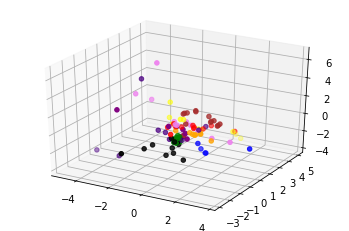

In [0]:
#plotting
fid = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = projected[:100,-1]
xdata = projected[:100,-3]
ydata = projected[:100,-2]
colors = ['black','brown','purple','violet','indigo','blue','green','yellow','orange','red']
ax.scatter3D(xdata, ydata, zdata, c=y_train[:100], cmap=matplotlib.colors.ListedColormap(colors));

In [0]:
def pairwise_distance(x, proj):
  num_examples = min(5000,x.shape[0])
  total_dist = 0.
  for i in range(num_examples):
    for j in range(i):
      total_dist += np.sum((x[i,:] - x[j,:])**2) - np.sum((proj[i,:] - proj[j,:])**2)
  return total_dist/(num_examples**2)

In [0]:
pairwise_distance(x_train, projected)

8798.456635657525